# EDA News Data
Comenzamos por un análisis exploratorio de los datos de noticias y eventos más relevantes de los años 2023, 2024 y 2025. Tenemos dos datasets y ambos se utilizarán para el análisis detallado.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from forecasting_bluesky import eda_plots as ep



## Dataset by subject
- 1814 filas
- 3 columnas:
  - **date**: fecha en la que se publica la noticia, en formato Y-m-d, va desde 2023-05-08 hasta 2025-04-07
  - **headline**: texto titular y/o resumen de la noticia
  - **subject**: tema del que trata la noticia

In [45]:
# Definición de paleta para los plots
sns.set_theme()
sns.set_palette('husl')

In [47]:
df_subject = pd.read_csv('news_data_classified_by_subject.csv')

In [49]:
df_subject['date'] = pd.to_datetime(df_subject['date'])
df_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1814 non-null   datetime64[ns]
 1   headline  1814 non-null   object        
 2   subject   1814 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 42.6+ KB


In [51]:
df_subject.head()

,date,headline,subject
0,2023-05-08,the tradition golf international winner steve ...,sports
1,2023-05-09,cyclone mocha forms in the indian ocean killin...,environment
2,2023-05-10,italian open tennis international winner men d...,sports
3,2023-05-10,karnataka legislative assembly election,elections
4,2023-05-11,the discovery of new moons of saturn is report...,science


In [53]:
df_subject.describe()

,date
count,1814
mean,2024-04-19 01:40:48.952590848
min,2023-05-08 00:00:00
25%,2023-11-05 00:00:00
50%,2024-05-03 12:00:00
75%,2024-10-01 18:00:00
max,2025-04-07 00:00:00


## Dataset by day
- 641 filas
- 16 columnas:
  - **date**: fecha en la que se publica la noticia, en formato Y-m-d, va desde 2023-05-08 hasta 2025-04-07
  - El resto de columnas son noticias con la temática de: 'africa', 'artificial_intelligence', 'asia', 'bluesky', 'china', 'election', 'europe', 'general', 'politics', 'referendum', 'science', 'spain', 'sports', 'us', 'videogames'.

In [56]:
df_day = pd.read_csv(csv.news_data_classified_by_day)

In [58]:
df_day['date'] = pd.to_datetime(df_day['date'])

df_day.columns

Index(['date', 'artificial intelligence', 'crime', 'education', 'elections',
       'entertainment', 'environment', 'finance', 'health', 'immigration',
       'international relations', 'pandemics', 'politics', 'protests',
       'science', 'sports', 'technology', 'videogames', 'war'],
      dtype='object')

In [60]:
df_day

,date,artificial intelligence,crime,education,elections,entertainment,environment,finance,health,immigration,international relations,pandemics,politics,protests,science,sports,technology,videogames,war
0,2023-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the tradition golf international winner steve ...,NaN,NaN,NaN
1,2023-05-09,NaN,NaN,NaN,NaN,NaN,cyclone mocha forms in the indian ocean killin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-10,NaN,NaN,NaN,karnataka legislative assembly election,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,italian open tennis international winner men d...,NaN,NaN,NaN
3,2023-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the world health organization ends its declara...,NaN,NaN,us president biden formally ends the declarati...,NaN,NaN,the discovery of new moons of saturn is report...,NaN,NaN,NaN,NaN
4,2023-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the title expulsion policy expires at midnight...,NaN,NaN,NaN,NaN,NaN,basketball champions league final four basketb...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2025-04-03,NaN,hungary withdraws from the international crimi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afc u asian cup association football continent...,NaN,NaN,NaN
637,2025-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,impeachment of yoon suk yeol the constitutiona...,NaN,NaN,NaN,NaN,NaN,NaN
638,2025-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,over protest events occur across the united st...,NaN,NaN,NaN,NaN,NaN
639,2025-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,montecarlo masters tennis international winner...,NaN,NaN,NaN


In [62]:
df_day = df_day.fillna('')

In [64]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     641 non-null    datetime64[ns]
 1   artificial intelligence  641 non-null    object        
 2   crime                    641 non-null    object        
 3   education                641 non-null    object        
 4   elections                641 non-null    object        
 5   entertainment            641 non-null    object        
 6   environment              641 non-null    object        
 7   finance                  641 non-null    object        
 8   health                   641 non-null    object        
 9   immigration              641 non-null    object        
 10  international relations  641 non-null    object        
 11  pandemics                641 non-null    object        
 12  politics                 641 non-nul

In [66]:
df_day.describe()

,date
count,641
mean,2024-04-18 17:38:05.803432192
min,2023-05-08 00:00:00
25%,2023-10-26 00:00:00
50%,2024-04-22 00:00:00
75%,2024-10-08 00:00:00
max,2025-04-07 00:00:00


## Análisis exploratorio de los datos

#### Análisis de frecuencias
Vemos cuántos registros tenemos de cada día.
- Los picos que se detectan en la recolección de registros diarios son debidos a las elecciones, ya que se celebran muchas en un mismo día.

******************************************************************************************************************************************************
2023
******************************************************************************************************************************************************


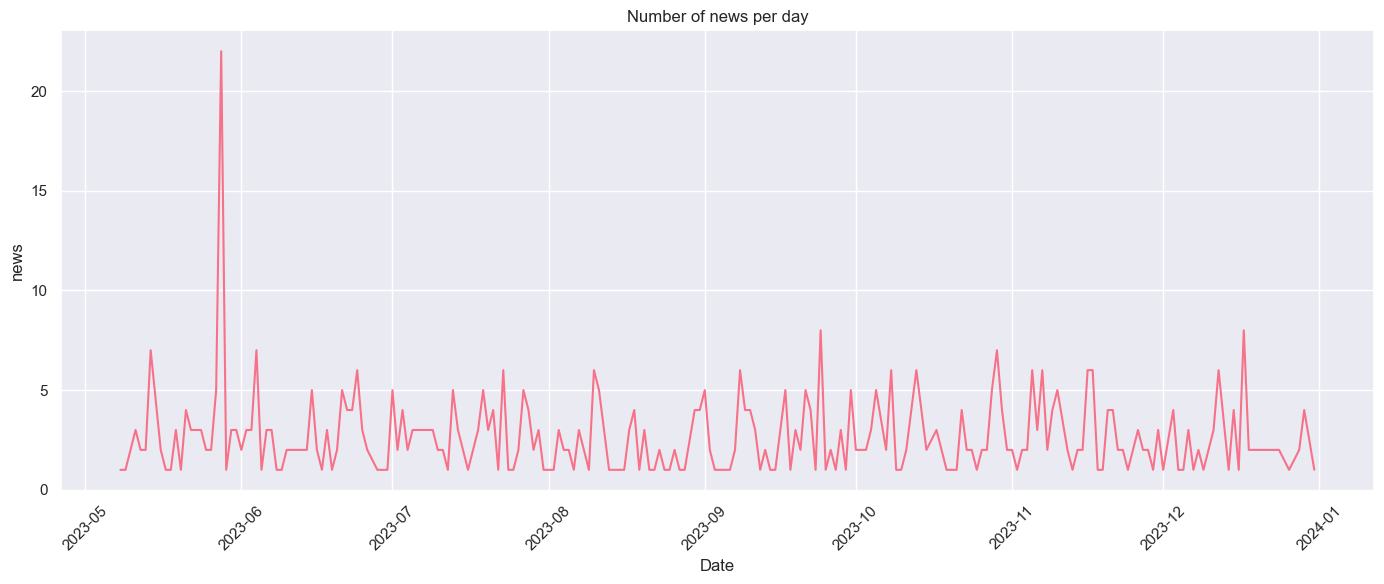

******************************************************************************************************************************************************
2024
******************************************************************************************************************************************************


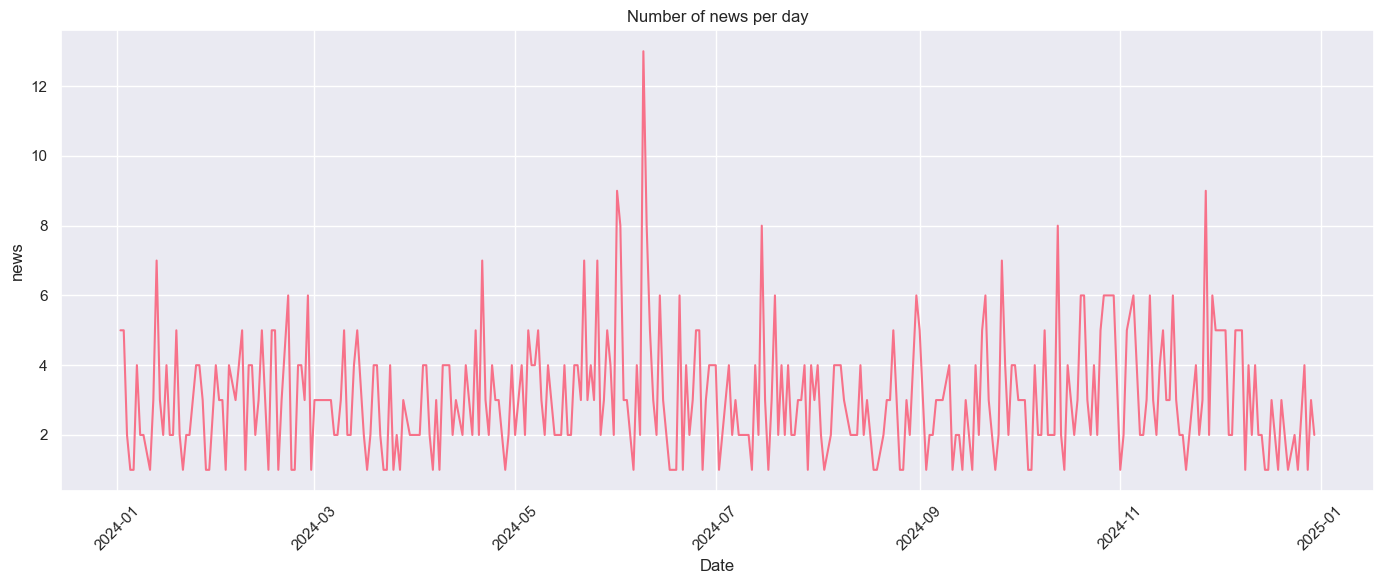

******************************************************************************************************************************************************
2025
******************************************************************************************************************************************************


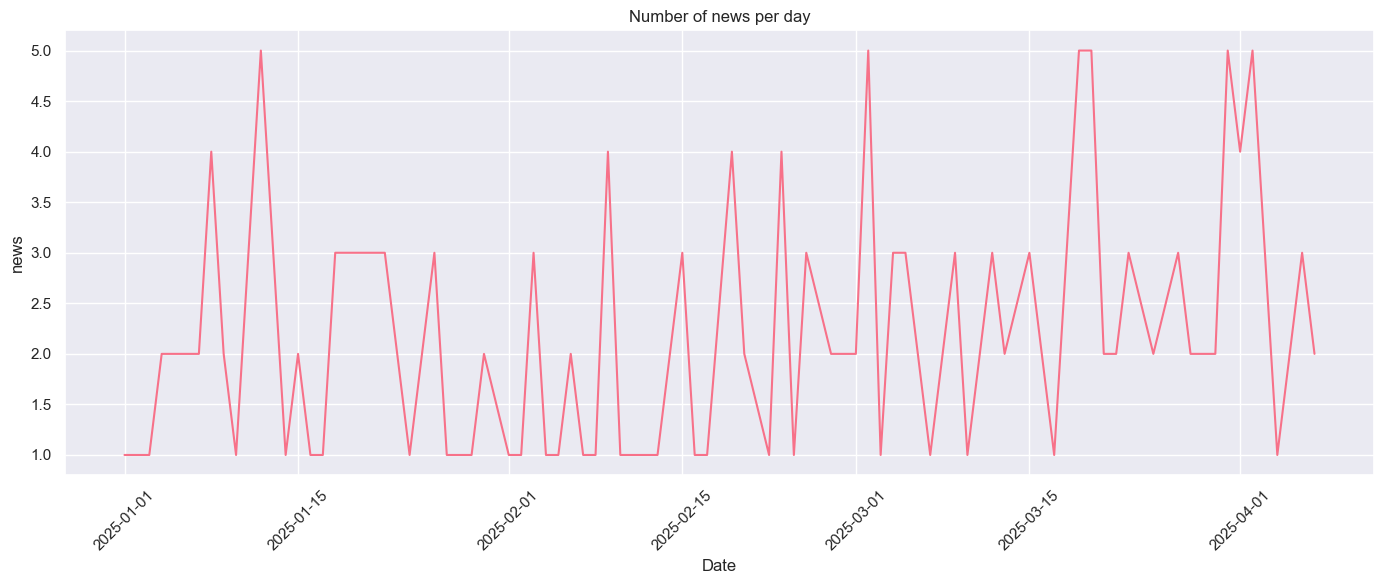

In [85]:
# Count how many records per day per year
for year in df_subject['date'].dt.year.unique():
    print('*'*150)
    print(year)
    print('*'*150)
    date_counts = df_subject[df_subject['date'].dt.year == year]['date'].value_counts().sort_index()
    ep.var_per_day(date_counts,'news')

#### Análisis de subject
- Los datos están muy desbalanceados por 'subject'.

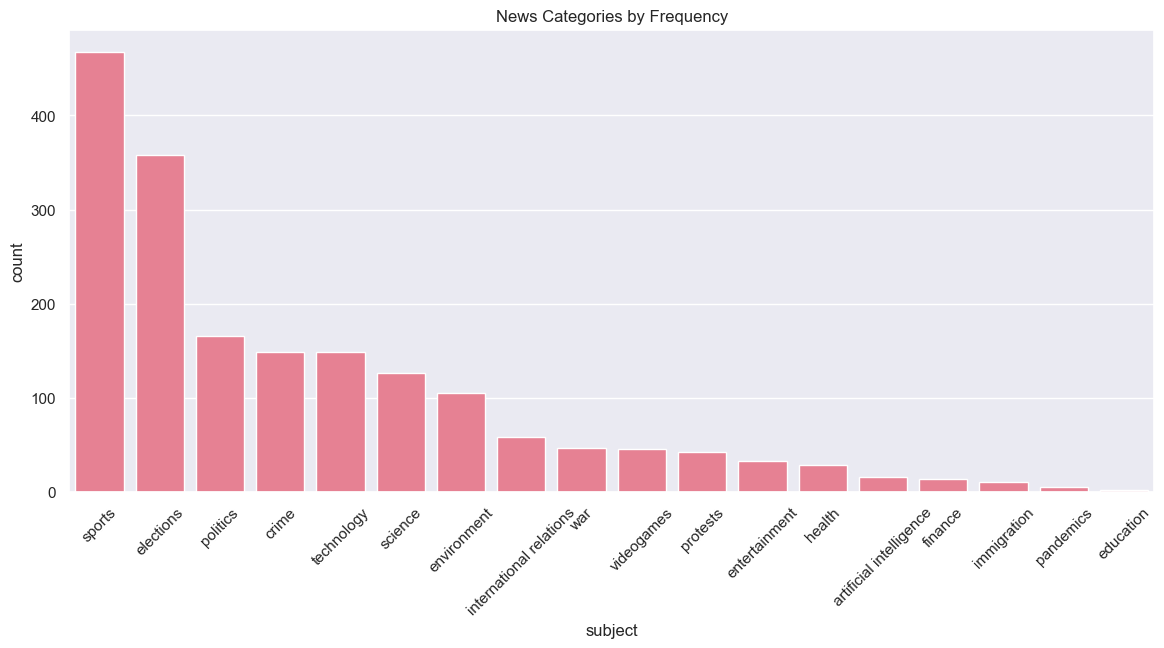

In [72]:
order = df_subject['subject'].value_counts().index

plt.figure(figsize=(14, 6))
sns.countplot(data=df_subject, x='subject', order=order)
plt.xticks(rotation=45)
plt.title('News Categories by Frequency')
plt.savefig('Categories by Frequency', dpi=300, bbox_inches='tight')
plt.show()

Para poder hacer un análisis más preciso de los subject creamos una nueva columna de categorización de subjects.

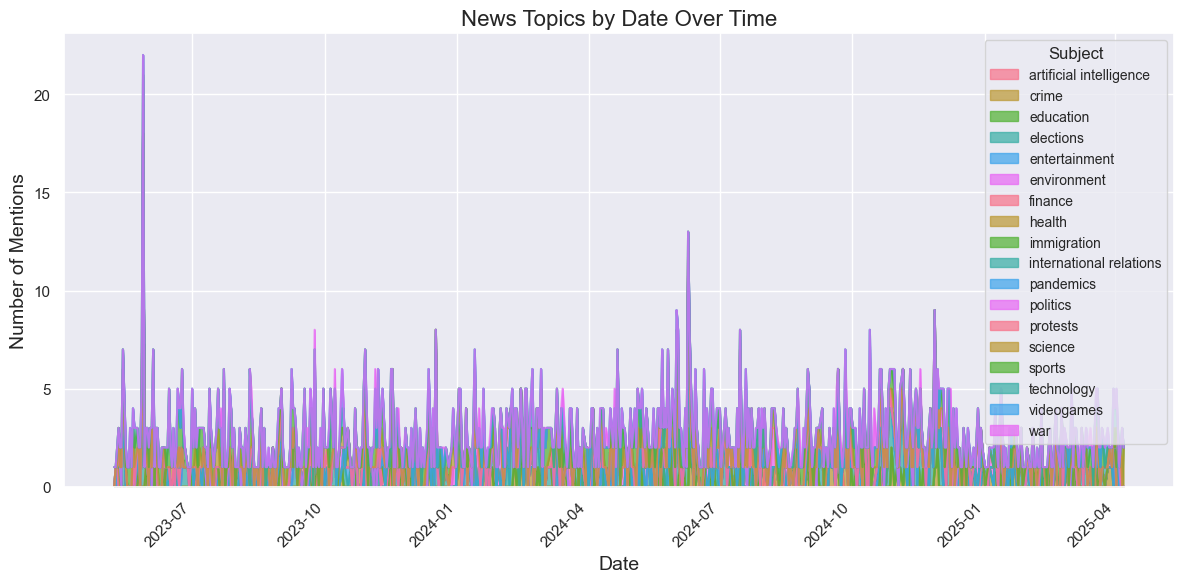

In [81]:
# Group by 'date' and 'category', count occurrences per subject each day
df_count = df_subject.groupby(['date', 'subject']).size().unstack(fill_value=0)

# Plot a stacked area plot to visualize the trend of subjects over time
ax = df_count.plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.7)

# Add labels and title for clarity
ax.set_title("News Topics by Date Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Number of Mentions", fontsize=14)
ax.legend(title="Subject", title_fontsize=12, fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

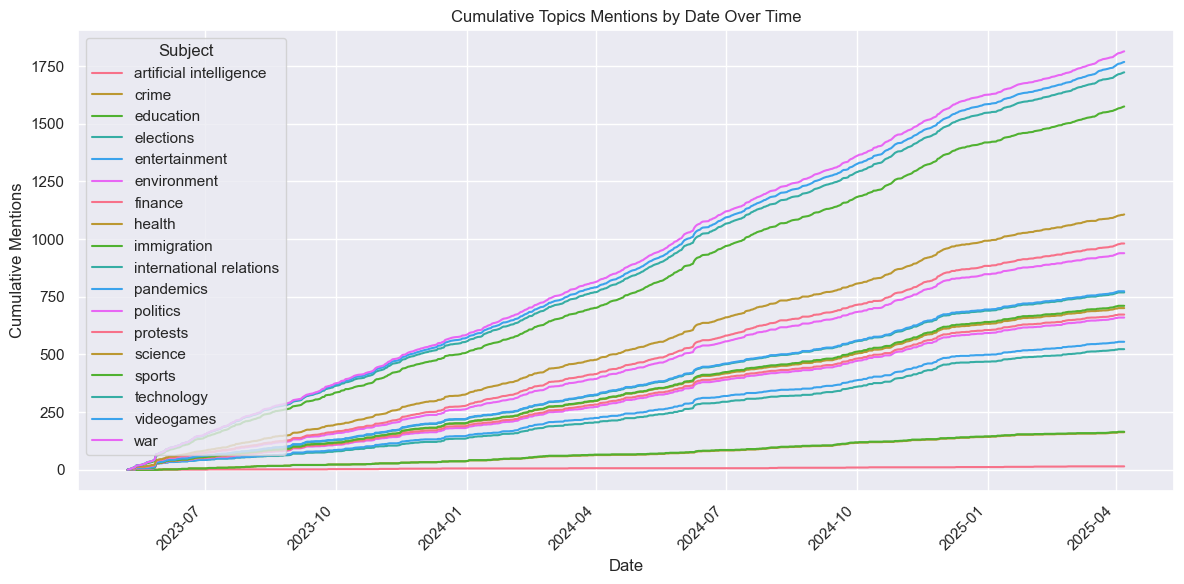

In [83]:
# Plot cumulative sum of mentions over time
df_count.cumsum().plot(kind='line', stacked=True, figsize=(12, 6))

plt.title("Cumulative Topics Mentions by Date Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Mentions")
plt.legend(title="Subject")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('cumulative_topic_mentions.png')
plt.show()